# NBA Rookie Tenure Prediction Model

### Authors: Ashwin Bala, Shawn Vetticad, Michael Fay, Aaron Liu

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import math

from matplotlib import pyplot
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [2]:
rawDat = pd.read_csv('nba_logreg.csv')

rawDat

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [3]:
rawDat.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [4]:
rawDat.dtypes

Name            object
GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs      int64
dtype: object

In [5]:
rawDat.tail()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1
1339,Jon Barry,47,11.7,4.4,1.6,4.4,36.9,0.4,1.3,33.3,...,1.0,67.3,0.2,0.7,0.9,1.4,0.7,0.1,0.9,1


While checking for some of the variables, we realized that there are a few duplicate variables in the dataset. 

In [6]:
rawDat.query("Name == 'Chris Smith'")

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
1334,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0


To deal with this, we are dropping duplicates and ensuring that the first values are taken

In [7]:
#A few columns are reappearing. Need to drop duplicates
rawDat = rawDat.drop_duplicates().groupby("Name").first()

In [8]:
#check for how many additional columns have been removed
len(rawDat)

1294

In [9]:
rawDat.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
A.C. Green,82,18.8,6.4,2.5,4.7,53.9,0.0,0.1,16.7,1.2,2.0,61.1,2.0,2.7,4.6,0.7,0.6,0.6,1.2,1
A.J. English,70,20.6,8.8,3.6,8.2,43.9,0.0,0.4,9.7,1.6,2.2,70.7,0.9,1.2,2.1,2.5,0.4,0.2,1.6,0
A.J. Price,56,15.4,7.3,2.6,6.3,41.0,1.1,3.1,34.5,1.1,1.3,80.0,0.2,1.4,1.6,1.9,0.6,0.1,1.1,1
Aaron Brooks,51,11.9,5.2,1.8,4.4,41.3,0.7,2.1,33.0,0.8,1.0,85.7,0.3,0.8,1.1,1.7,0.3,0.1,0.9,1
Aaron Gordon,47,17.0,5.2,2.0,4.4,44.7,0.3,1.0,27.1,0.9,1.3,72.1,1.0,2.6,3.6,0.7,0.5,0.5,0.8,0


Additionally, we realize that the column names have a few characters that could cause problems when we are modelling. Spaces and % symbols will probably not be recognized by our model. We account for those issues under

In [10]:
rawDat.columns = rawDat.columns.str.replace(' ','_')

In [11]:
rawDat.columns = rawDat.columns.str.replace('%','percent')

We also realized that certain numbers are not recognized by the glm function, so we are replacing those numbers as well

In [12]:
rawDat.columns = rawDat.columns.str.replace('3','Three')

In [13]:
rawDat.columns = rawDat.columns.str.replace('5','five')

In [14]:
rawDat.columns = rawDat.columns.str.capitalize()

In [15]:
rawDat

,Gp,Min,Pts,Fgm,Fga,Fgpercent,Threep_made,Threepa,Threeppercent,Ftm,Fta,Ftpercent,Oreb,Dreb,Reb,Ast,Stl,Blk,Tov,Target_fiveyrs
Name,,,,,,,,,,,,,,,,,,,,
A.C. Green,82,18.8,6.4,2.5,4.7,53.9,0.0,0.1,16.7,1.2,2.0,61.1,2.0,2.7,4.6,0.7,0.6,0.6,1.2,1
A.J. English,70,20.6,8.8,3.6,8.2,43.9,0.0,0.4,9.7,1.6,2.2,70.7,0.9,1.2,2.1,2.5,0.4,0.2,1.6,0
A.J. Price,56,15.4,7.3,2.6,6.3,41.0,1.1,3.1,34.5,1.1,1.3,80.0,0.2,1.4,1.6,1.9,0.6,0.1,1.1,1
Aaron Brooks,51,11.9,5.2,1.8,4.4,41.3,0.7,2.1,33.0,0.8,1.0,85.7,0.3,0.8,1.1,1.7,0.3,0.1,0.9,1
Aaron Gordon,47,17.0,5.2,2.0,4.4,44.7,0.3,1.0,27.1,0.9,1.3,72.1,1.0,2.6,3.6,0.7,0.5,0.5,0.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winston Bennett,55,18.0,6.1,2.5,5.2,47.9,0.0,0.0,0.0,1.2,1.7,66.7,1.5,1.9,3.4,1.0,0.4,0.2,1.1,0
Winston Garland,67,31.7,12.4,5.1,11.6,43.9,0.2,0.6,33.3,2.1,2.3,87.9,1.0,2.4,3.4,6.4,1.7,0.1,2.5,1
Xavier McDaniel,82,33.0,17.1,7.0,14.3,49.0,0.0,0.1,20.0,3.0,4.4,68.7,3.7,4.2,8.0,2.4,1.2,0.5,3.0,1


## Converting the datatype of our Dependent Variable to Int

In [16]:
rawDat["Target_fiveyrs"] = rawDat["Target_fiveyrs"].astype(bool)
#use as type bool 

In [17]:
rawDat.groupby("Target_fiveyrs").size()

Target_fiveyrs
False    487
True     807
dtype: int64

In [18]:
rawDat.dtypes

Gp                  int64
Min               float64
Pts               float64
Fgm               float64
Fga               float64
Fgpercent         float64
Threep_made       float64
Threepa           float64
Threeppercent     float64
Ftm               float64
Fta               float64
Ftpercent         float64
Oreb              float64
Dreb              float64
Reb               float64
Ast               float64
Stl               float64
Blk               float64
Tov               float64
Target_fiveyrs       bool
dtype: object

## Identifying the Dependent Variable

Checking the spread of our target variable (Target_5Yrs)-- A binary datatype variable where 1 indicates that the player completed more than 5 years in the league and 0 indicating that the player did not make it past the 5 year mark

In [19]:
rawDat.groupby('Target_fiveyrs').size()

Target_fiveyrs
False    487
True     807
dtype: int64

<AxesSubplot:xlabel='Target_fiveyrs', ylabel='count'>

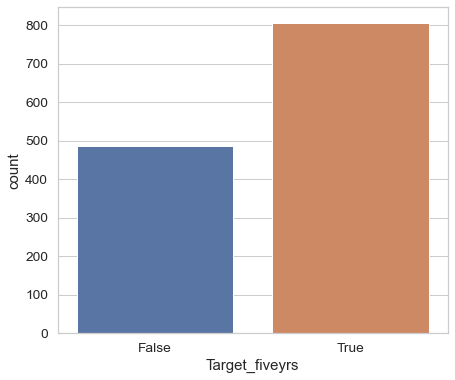

In [20]:
#Visualizing the same
sns.set(rc = {'figure.figsize': (7, 6)},
        font_scale = 1.25) # increase text size on plots (e.g., axis labels)
sns.set_style('whitegrid')

sns.countplot(x = 'Target_fiveyrs', 
              data = rawDat)

## Splitting the Data

Now that we have a good idea of our outcome variable, we can split the data into train and test.

In [21]:
Train, Test = train_test_split(rawDat, 
                               stratify = rawDat.Target_fiveyrs,
                               test_size = 0.20, 
                               random_state = 345)

## Class Balancing

There was a slight imbalance in the spread of our Dependent Variable when we looked at the split, we will check for this again with the stratified data

In [22]:
display(Train.groupby('Target_fiveyrs').size())
round(Train.groupby('Target_fiveyrs').size()/len(Train), 3)

Target_fiveyrs
False    390
True     645
dtype: int64

Target_fiveyrs
False    0.377
True     0.623
dtype: float64

It is not extremely skewed, but it is still worth it for us to downsample the data

In [23]:
np.random.seed(345) # to create reproducible results

maj_class = np.where(Train.Target_fiveyrs == True)[0]
min_class = np.where(Train.Target_fiveyrs == False)[0]

resample = np.random.choice(maj_class, size = len(min_class), replace = False)

TrainDS = pd.concat([Train.iloc[min_class], Train.iloc[resample]])

TrainDS.shape

(780, 20)

## Preprocessing

The data is almost ready to be analyzed, just have to check for certain missing values  

In [24]:
round(1 - len(TrainDS.dropna())/len(TrainDS), 3)

0.0

There are no missing values, so we do not have to deal with any imputation or other techniques to take care of missing values. We also are dealing with almost only numeric variables, except for name being a categorical variable. However as name does not repeat anywhere, we will not be using it in the model. With the group by procedure and removing duplicate numbers, we have converted the Name column to the index, which automatically takes care of that.


We will, however conduct a Zero Variance removal to check 

In [25]:
selector = VarianceThreshold()

sel_raw_data_train = TrainDS.drop(columns = 'Target_fiveyrs')

selector = selector.fit(sel_raw_data_train)

selected_data_train = sel_raw_data_train.iloc[:, selector.get_support(indices = True)]

TrainDS_Sel = pd.concat([TrainDS.drop(sel_raw_data_train.columns, axis = 1), selected_data_train], axis = 1)

TrainDS_Sel.head()

,Target_fiveyrs,Gp,Min,Pts,Fgm,Fga,Fgpercent,Threep_made,Threepa,Threeppercent,Ftm,Fta,Ftpercent,Oreb,Dreb,Reb,Ast,Stl,Blk,Tov
Name,,,,,,,,,,,,,,,,,,,,
Willie White,False,39,6.0,3.3,1.3,3.2,41.9,0.1,0.3,36.4,0.5,0.8,67.7,0.4,0.5,0.9,0.7,0.1,0.1,0.8
Vincent Yarbrough,False,59,23.4,6.9,2.8,7.3,39.3,0.4,1.3,26.9,0.8,1.1,79.0,0.6,2.1,2.7,2.2,1.0,0.6,1.4
Rod Foster,False,80,17.8,8.3,3.3,7.3,44.8,0.3,1.1,26.2,1.5,1.9,78.7,0.5,1.0,1.5,2.2,0.7,0.1,1.4
C.J. McCollum,False,38,12.5,5.3,1.9,4.7,41.6,0.8,2.1,37.5,0.6,0.9,67.6,0.2,1.1,1.3,0.7,0.4,0.1,0.9
Maalik Wayns,False,27,7.5,2.8,1.0,3.3,29.5,0.3,1.1,22.6,0.6,0.7,89.5,0.0,0.2,0.3,1.0,0.2,0.0,0.6


Finally, we will now scale our variables, since most are not binary and while they are mostly calculated on the same scale (per game average of each metric) it is not all scaled the same way. This might influence our model results. We will run a robust scaling model on all our variables. This might not be the ideal method in achieving our output, but it is the safest in terms of ensuring there is no skew when we run our models

In [26]:
scaler = RobustScaler()

sca_raw_data_train = TrainDS_Sel.drop(columns = 'Target_fiveyrs').select_dtypes(exclude = ['object', 'category'])

scaler = scaler.fit(sca_raw_data_train)

scaled_data_train = pd.DataFrame(scaler.transform(sca_raw_data_train))

scaled_data_train.columns = sca_raw_data_train.columns
scaled_data_train.index = sca_raw_data_train.index

TrainDS_SelSca = pd.concat([TrainDS_Sel.drop(sca_raw_data_train.columns, axis = 1), scaled_data_train], axis = 1)

TrainDS_SelSca.head()

,Target_fiveyrs,Gp,Min,Pts,Fgm,Fga,Fgpercent,Threep_made,Threepa,Threeppercent,Ftm,Fta,Ftpercent,Oreb,Dreb,Reb,Ast,Stl,Blk,Tov
Name,,,,,,,,,,,,,,,,,,,,
Willie White,False,-0.709677,-0.824524,-0.406091,-0.383562,-0.341463,-0.2250,0.00,0.000000,0.434375,-0.500000,-0.461538,-0.279773,-0.3,-0.800000,-0.652174,-0.250000,-0.8,-0.25,-0.250
Vincent Yarbrough,False,-0.064516,0.646934,0.324873,0.438356,0.658537,-0.5500,0.75,0.833333,0.137500,-0.166667,-0.230769,0.574669,-0.1,0.266667,0.130435,0.821429,1.0,1.00,0.500
Rod Foster,False,0.612903,0.173362,0.609137,0.712329,0.658537,0.1375,0.50,0.666667,0.115625,0.611111,0.384615,0.551985,-0.2,-0.466667,-0.391304,0.821429,0.4,-0.25,0.500
C.J. McCollum,False,-0.741935,-0.274841,0.000000,-0.054795,0.024390,-0.2625,1.75,1.500000,0.468750,-0.388889,-0.384615,-0.287335,-0.5,-0.400000,-0.478261,-0.250000,-0.2,-0.25,-0.125
Maalik Wayns,False,-1.096774,-0.697674,-0.507614,-0.547945,-0.317073,-1.7750,0.50,0.666667,0.003125,-0.388889,-0.538462,1.368620,-0.7,-1.000000,-0.913043,-0.035714,-0.6,-0.50,-0.500


Now, let's run the same steps to our test data as well using the training data to complete the process


In [27]:

# scaling

sca_raw_data_test = Test.drop(columns = 'Target_fiveyrs')

scaled_data_test = pd.DataFrame(scaler.transform(sca_raw_data_test))

scaled_data_test.columns = sca_raw_data_test.columns
scaled_data_test.index = sca_raw_data_test.index

Test_Sca = pd.concat([Test.drop(sca_raw_data_test.columns, axis = 1), scaled_data_test], axis = 1)

# final result

Test_Sca.head()

,Target_fiveyrs,Gp,Min,Pts,Fgm,Fga,Fgpercent,Threep_made,Threepa,Threeppercent,Ftm,Fta,Ftpercent,Oreb,Dreb,Reb,Ast,Stl,Blk,Tov
Name,,,,,,,,,,,,,,,,,,,,
Rory White,True,0.129032,-0.520085,-0.060914,0.000000,-0.243902,1.3250,-0.25,-0.250000,-0.703125,0.166667,0.230769,-0.544423,0.0,-0.533333,-0.347826,-0.392857,-0.4,-0.50,-0.250
William Bedford,True,-0.354839,0.325581,0.284264,0.438356,0.634146,-0.5000,-0.25,-0.250000,-0.703125,0.055556,0.230769,-1.005671,0.9,1.066667,1.086957,0.035714,-0.2,1.25,0.875
Sam Young,False,0.612903,0.063425,0.426396,0.438356,0.390244,0.1750,0.00,0.333333,-0.090625,0.833333,0.615385,0.476371,0.3,-0.066667,0.043478,-0.250000,-0.2,0.25,0.250
Jon Leuer,True,-0.483871,-0.308668,-0.121827,0.054795,-0.097561,0.8875,0.00,-0.083333,0.337500,-0.500000,-0.615385,0.272212,0.3,-0.066667,0.086957,-0.392857,-0.4,0.50,-0.750
Chris Douglas-Roberts,True,-0.548387,-0.207188,-0.081218,-0.109589,-0.146341,0.2875,0.00,0.000000,0.078125,0.277778,0.000000,0.824197,-0.4,-0.600000,-0.565217,0.107143,-0.4,0.00,-0.375


# Model Fitting

We are now ready to fit our model. As it is a binary classification, we will initially be running 4 models that we believe are the most relevant to our analysis:

1. Decision Tree
2. AdaBoost
3. Random Forest
4. Logistic Regression (Lasso/Ridge Regularized)

Additionally, we will be explore the various hyperparameters as part of our tuning process

In [28]:
# set up data and labels
X_train = TrainDS_SelSca.drop(columns = 'Target_fiveyrs')
y_train = TrainDS_SelSca.Target_fiveyrs

X_test = Test_Sca.drop(columns = 'Target_fiveyrs')
y_test = Test_Sca.Target_fiveyrs

pos_label = True

# set up scoring metric
scoring_metric = 'balanced_accuracy'

# set up classifiers and tuning parameters
names = ['Decision Tree', 'AdaBoost', 'Random Forest', 'Logistic Regression']
    classifiers = [DecisionTreeClassifier(random_state = 345), 
                   AdaBoostClassifier(random_state = 345), 
                   RandomForestClassifier(random_state = 345), 
                   LogisticRegression(random_state = 345, solver = 'liblinear')]
param_grids = [{'max_depth': [2, 3, 4, 5, 10, 15, 30], 'criterion': ['gini', 'entropy']},
               {'n_estimators': [50, 100, 200, 300]},
               {'max_depth': [2, 3, 4, 5, 10], 'max_features': [None, 'sqrt', 'log2'], 'n_estimators': [50, 100, 200, 300]},
               {'penalty': ['l1', 'l2']}]

# create empty lists for storing outcomes
models = []
preds = []
probs = []
BAs = []
AUCs = []
FPRs = []
TPRs = []
timings = []

# train classifiers and generate test predictions/probabilities
for i, eachClassifier in enumerate(classifiers):
    
    print('Now working on model ', i + 1, ' of ', len(classifiers), ': ', names[i], sep = '')
    
    # define cross-validation/parameter tuning settings
    search = GridSearchCV(eachClassifier, 
                          param_grids[i], 
                          cv = 5, # using (Stratified)KFold by default (with 5 folds)
                          scoring = scoring_metric,
                          n_jobs = -1) # use parallel processing
    
    model = search.fit(X_train, y_train)
    pred = search.predict(X_test)
    prob = search.predict_proba(X_test)[:, 1]
    
    models.append(model)
    preds.append(pred)
    probs.append(prob)
    
    BAs.append(balanced_accuracy_score(y_test, pred))
    AUCs.append(roc_auc_score(y_test, prob))
    
    FPR, TPR, _ = roc_curve(y_test, prob, pos_label = pos_label)
    
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    timings.append(model.refit_time_)
    
print('Finished!')

Now working on model 1 of 4: Decision Tree
Now working on model 2 of 4: AdaBoost
Now working on model 3 of 4: Random Forest
Now working on model 4 of 4: Logistic Regression
Finished!


# Evaluation

We will use a few ways to check for our results to choose our best model

Starting with AUC:

In [29]:
results = pd.DataFrame({'Classifier': names, 
                        'Balanced Accuracy': BAs, 
                        'AUC': AUCs, 
                        'TPR': TPRs, 
                        'FPR': FPRs, 
                        'Refit Time': timings}).sort_values('AUC', ascending = False)

display(round(results[['Classifier', 'Refit Time', 'Balanced Accuracy', 'AUC']], 3))

,Classifier,Refit Time,Balanced Accuracy,AUC
3,Logistic Regression,0.025,0.665,0.745
2,Random Forest,0.448,0.669,0.733
0,Decision Tree,0.000,0.659,0.689
1,AdaBoost,0.080,0.620,0.675


It appears that the logistic regression is our most successful model. We will visualize these models too now:

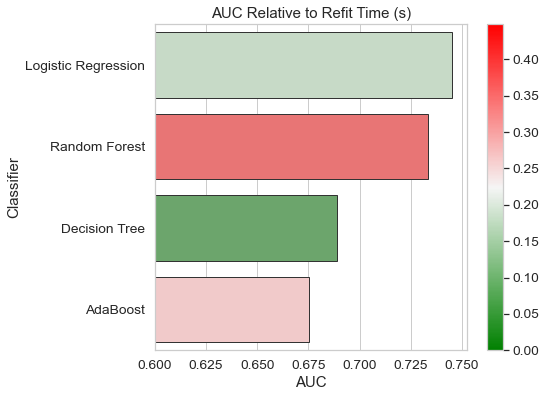

In [30]:
greenToRed = LinearSegmentedColormap.from_list('', ['green', 'whitesmoke', 'red'])
cm.register_cmap('green_to_red', greenToRed)

normRTs = plt.Normalize(results['Refit Time'].min(), results['Refit Time'].max())
smRTs = plt.cm.ScalarMappable(cmap = 'green_to_red', norm = normRTs)

ax = sns.barplot(y = 'Classifier', 
                 x = 'AUC', 
                 hue = 'Refit Time', 
                 dodge = False, 
                 palette = 'green_to_red', 
                 edgecolor = '.2', 
                 data = results)

ax.get_legend().remove()
ax.figure.colorbar(smRTs)
ax.set(title = 'AUC Relative to Refit Time (s)')
ax.set(xlim = (math.floor(results.AUC.min() * 10) * 10/100, 
               results.AUC.max() * 1.01))

plt.show()

### ROC Plot

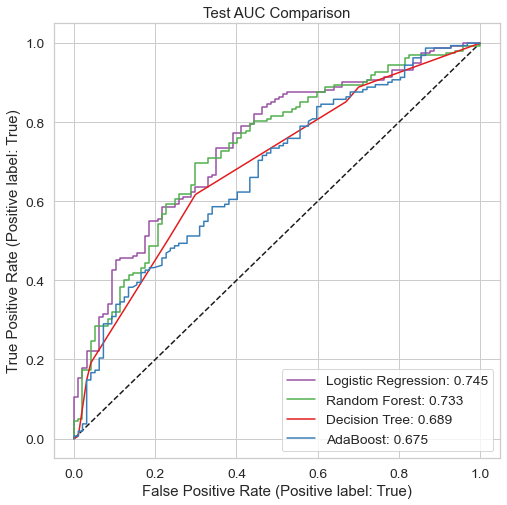

In [31]:
# defining a custom function for reuse later
def Custom_ROC_Plot (results, X_test, y_test, title, figwidth = 8, figheight = 8):

    fig, ax = plt.subplots(figsize = (figwidth, figheight))

    ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = 'k')
    ax.set(title = title)

    for i in results.index:
        RocCurveDisplay.from_estimator(models[i], 
                                       X_test, 
                                       y_test, 
                                       color = cm.Set1(i), 
                                       label = results.loc[i, 'Classifier'] + ': {:.3f}'.format(results.loc[i, 'AUC']),  
                                       ax = ax)
        
    return([fig, ax])

fig, ax = Custom_ROC_Plot(results, X_test, y_test, title = 'Test AUC Comparison')

### Confusion Matrix

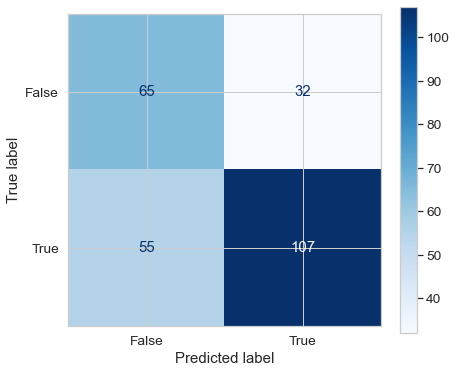

In [32]:
best_index = results.index[0]

# note: for a simple printed matrix, you can use:
# confusion_matrix(y_test, preds[best_index])

ConfusionMatrixDisplay.from_estimator(models[best_index], 
                                      X_test, 
                                      y_test,
                                      cmap = plt.cm.Blues,
                                      values_format = 'd')

### Classification Report

In [33]:
print(classification_report(y_test, preds[best_index], digits = 3))

              precision    recall  f1-score   support

       False      0.542     0.670     0.599        97
        True      0.770     0.660     0.711       162

    accuracy                          0.664       259
   macro avg      0.656     0.665     0.655       259
weighted avg      0.684     0.664     0.669       259



### Variable Importance Matrix

The accuracy of the logistic regression model works best, but can we do better? There are quite a few variables that are existent in our model, and maybe not all of them seem to impact it in the same way. We will now check for the feature importance to see if there are certain variables that are more important and relevant to us

<AxesSubplot:xlabel='importance', ylabel='feature'>

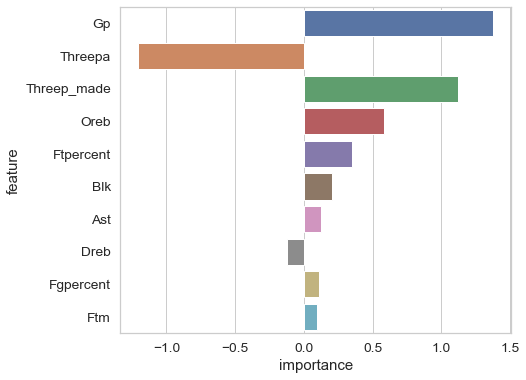

In [34]:
# for models with feature importances
if hasattr(models[best_index].best_estimator_, 'feature_importances_'):
    var_imp = pd.DataFrame({
        'feature': X_test.columns, 
        'importance': models[best_index].best_estimator_.feature_importances_}).sort_values('importance', ascending = False)
# for models with coefficients (directional) -- note: for interpretation and potential caveats, see https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html
elif hasattr(models[best_index].best_estimator_, 'coef_'):
    var_imp = pd.DataFrame({
        'feature': X_test.columns, 
        'importance_abs': abs(models[best_index].best_estimator_.coef_[0]), 
        'importance': models[best_index].best_estimator_.coef_[0]}).sort_values('importance_abs', ascending = False)
    
sns.barplot(y = 'feature', 
            x = 'importance', 
            data = var_imp.head(10))

We have got a feature importance graph, which indicates which variables impact our model the most. We will not check for which logistic model worked (lasso or ridge)

In [35]:
models[best_index].best_estimator_

LogisticRegression(penalty='l1', random_state=345, solver='liblinear')

The lasso logistic regression model worked the best

### Running a model with the most relevant variables

We have a view of the top 10 variables that are impacting our model. The 5 most important statistics appear to be; Games Played (GP), 3 Points Attempted (3PA), 3 Points Made (3P_Made), Offensive Rebounds (OREB) and Free Throw Percentage (FTPercent). 

Since the data spans a long period of time, and there has been a huge change in the makeup of the game in recent times (for example, the analytics boom has pushed 3 point shooting to an unprecendented level). Therefore we are quite excited by the fact that shooting metrics are heavily involved in our most important features

In [36]:
formula = 'Target_fiveyrs ~ ' + var_imp.feature.head(5).str.cat(sep = ' + ')
formula

'Target_fiveyrs ~ Gp + Threepa + Threep_made + Oreb + Ftpercent'

In [37]:
rawDat.columns

Index(['Gp', 'Min', 'Pts', 'Fgm', 'Fga', 'Fgpercent', 'Threep_made', 'Threepa',
       'Threeppercent', 'Ftm', 'Fta', 'Ftpercent', 'Oreb', 'Dreb', 'Reb',
       'Ast', 'Stl', 'Blk', 'Tov', 'Target_fiveyrs'],
      dtype='object')

In [38]:
mod1 = smf.glm(formula = formula, data = rawDat, family = sm.families.Binomial()).fit()

mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Generalized Linear Model Regression Results                                 
=============================================================================================================
Dep. Variable:     ['Target_fiveyrs[False]', 'Target_fiveyrs[True]']   No. Observations:                 1294
Model:                                                           GLM   Df Residuals:                     1288
Model Family:                                               Binomial   Df Model:                            5
Link Function:                                                 logit   Scale:                          1.0000
Method:                                                         IRLS   Log-Likelihood:                -710.16
Date:                                               Sun, 09 Jan 2022   Deviance:                       1420.3
Time:                                                       12:17:37   Pearson chi2:                 1.32e+03
No. Iterations:                                                    5                                         
Covariance Type:                                           nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.9190      0.499      7.849      0.000       2.940       4.898
Gp             -0.0423      0.004     -9.794      0.000      -0.051      -0.034
Threepa         1.0920      0.341      3.207      0.001       0.425       1.759
Threep_made    -3.0594      0.948     -3.226      0.001      -4.918      -1.201
Oreb           -0.7625      0.120     -6.350      0.000      -0.998      -0.527
Ftpercent      -0.0190      0.007     -2.841      0.005      -0.032      -0.006
===============================================================================
"""

In [39]:
mod1.wald_test_terms().table.astype({'statistic': 'float', 'pvalue': 'float'}).round(3)

,statistic,pvalue,df_constraint
Intercept,61.611,0.000,1
Gp,95.926,0.000,1
Threepa,10.285,0.001,1
Threep_made,10.407,0.001,1
Oreb,40.317,0.000,1
Ftpercent,8.068,0.005,1


### Effect plot for the top 5 important variables

In [40]:
from rpy2.robjects.packages import importr
from rpy2 import robjects
from rpy2.robjects import pandas2ri
base = importr('base')
stats = importr('stats')
effects = importr('effects')

df = robjects.r('data.frame')
coef = robjects.r('coef')

In [41]:
pandas2ri.activate()
robjects.globalenv['rawDat'] = rawDat
robjects.r('rawDat$Target_fiveyrs <- factor(rawDat$Target_fiveyrs, levels = c("FALSE", "TRUE"))')

mod1R = stats.glm(formula, data =robjects.globalenv['rawDat'], family = 'binomial')
coef(mod1R)

array([-3.91898347,  0.04229159, -1.09198354,  3.05942075,  0.76251324,
        0.01897377])

In [42]:
# Gp

plotEffect = df(effects.effect('Gp', mod1R, xlevels = 48))

plotEffect[plotEffect.select_dtypes('category').columns] = plotEffect.select_dtypes('category').astype('object').astype('category') # fixes rpy2 issue with NA_character_

display(plotEffect.head(5))

,Gp,fit,se,lower,upper
1,11.0,0.191521,0.033938,0.133573,0.266867
2,13.0,0.204961,0.034379,0.145657,0.280483
3,14.0,0.211939,0.034555,0.152029,0.287454
4,16.0,0.226410,0.034810,0.165449,0.301711
5,17.0,0.233903,0.034887,0.172503,0.308995


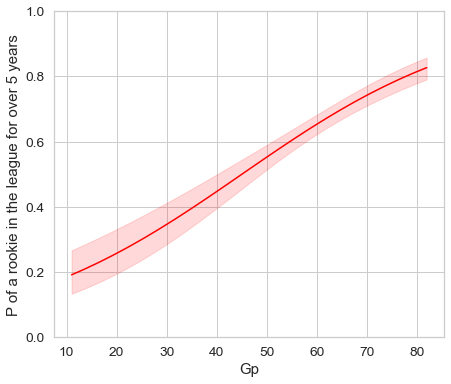

In [43]:
# define colors
cust_colors = ['red']
sns.set_palette(cust_colors)

# define variables
xVar = 'Gp'

fig = sns.lineplot(x = xVar, 
                   y = 'fit', 
                   data = plotEffect)

# plot ribbon for level
plt.fill_between(x = xVar, 
                 y1 = 'lower', 
                 y2 = 'upper', 
                 color = cust_colors[0], 
                 alpha = 0.15, 
                 data = plotEffect)
    
fig.set(ylabel = 'P of a rookie in the league for over 5 years', 
        ylim = (0, 1));

In [44]:
# Oreb

plotEffect2 = df(effects.effect('Oreb', mod1R, xlevels = 48))

plotEffect2[plotEffect2.select_dtypes('category').columns] = plotEffect2.select_dtypes('category').astype('object').astype('category') # fixes rpy2 issue with NA_character_

display(plotEffect2.head(5))

,Oreb,fit,se,lower,upper
1,0.00,0.470226,0.030720,0.410734,0.530576
2,0.11,0.491161,0.028078,0.436456,0.546078
3,0.23,0.514031,0.025229,0.464607,0.563182
4,0.34,0.534947,0.022726,0.490244,0.579095
5,0.45,0.555741,0.020417,0.515448,0.595313


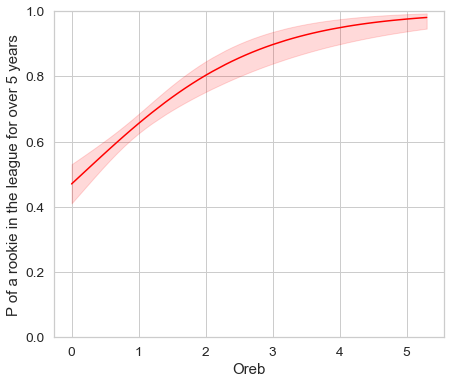

In [45]:
# define colors
cust_colors = ['red']
sns.set_palette(cust_colors)

# define variables
xVar2 = 'Oreb'

fig = sns.lineplot(x = xVar2, 
                   y = 'fit', 
                   data = plotEffect2)

# plot ribbon for level
plt.fill_between(x = xVar2, 
                 y1 = 'lower', 
                 y2 = 'upper', 
                 color = cust_colors[0], 
                 alpha = 0.15, 
                 data = plotEffect2)
    
fig.set(ylabel = 'P of a rookie in the league for over 5 years', 
        ylim = (0, 1));

In [46]:
# Three points attempted

plotEffect3 = df(effects.effect('Threepa', mod1R, xlevels = 48))

plotEffect3[plotEffect3.select_dtypes('category').columns] = plotEffect3.select_dtypes('category').astype('object').astype('category') # fixes rpy2 issue with NA_character_

display(plotEffect3.head(5))

,Threepa,fit,se,lower,upper
1,0.00,0.818220,0.041200,0.723406,0.885669
2,0.14,0.794367,0.037744,0.710656,0.858676
3,0.28,0.768272,0.033114,0.697203,0.826803
4,0.41,0.742044,0.027881,0.683767,0.792835
5,0.55,0.711718,0.021701,0.667398,0.752324


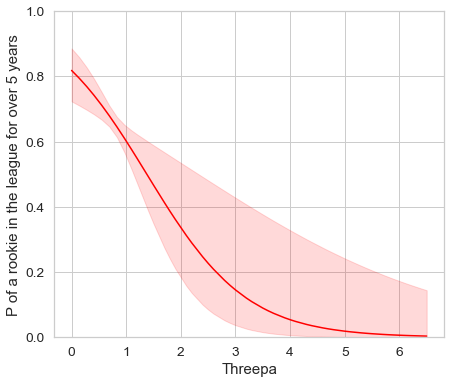

In [47]:
# define colors
cust_colors = ['red']
sns.set_palette(cust_colors)

# define variables
xVar3 = 'Threepa'

fig = sns.lineplot(x = xVar3, 
                   y = 'fit', 
                   data = plotEffect3)

# plot ribbon for level
plt.fill_between(x = xVar3, 
                 y1 = 'lower', 
                 y2 = 'upper', 
                 color = cust_colors[0], 
                 alpha = 0.15, 
                 data = plotEffect3)
    
fig.set(ylabel = 'P of a rookie in the league for over 5 years', 
        ylim = (0, 1));

In [48]:
# Three points made

plotEffect4 = df(effects.effect('Threep_made', mod1R, xlevels = 48))

plotEffect4[plotEffect4.select_dtypes('category').columns] = plotEffect4.select_dtypes('category').astype('object').astype('category') # fixes rpy2 issue with NA_character_

display(plotEffect4.head(5))

,Threep_made,fit,se,lower,upper
1,0.0000,0.471361,0.060771,0.356019,0.589844
2,0.0489,0.508730,0.049920,0.411793,0.605015
3,0.0979,0.546078,0.038867,0.469416,0.620615
4,0.1470,0.582988,0.028328,0.526642,0.637247
5,0.1960,0.618919,0.019613,0.579808,0.656547


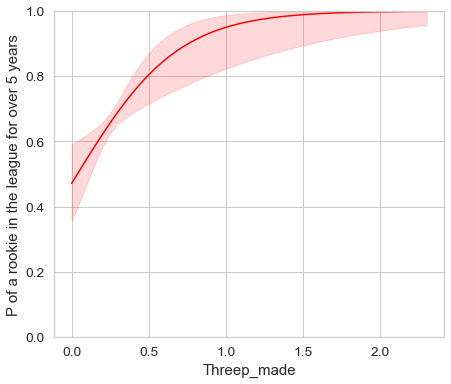

In [49]:
# define colors
cust_colors = ['red']
sns.set_palette(cust_colors)

# define variables
xVar4 = 'Threep_made'

fig = sns.lineplot(x = xVar4, 
                   y = 'fit', 
                   data = plotEffect4)

# plot ribbon for level
plt.fill_between(x = xVar4, 
                 y1 = 'lower', 
                 y2 = 'upper', 
                 color = cust_colors[0], 
                 alpha = 0.15, 
                 data = plotEffect4)
    
fig.set(ylabel = 'P of a rookie in the league for over 5 years', 
        ylim = (0, 1));

In [50]:
# Three points made

plotEffect5 = df(effects.effect('Ftpercent', mod1R, xlevels = 48))

plotEffect5[plotEffect5.select_dtypes('category').columns] = plotEffect5.select_dtypes('category').astype('object').astype('category') # fixes rpy2 issue with NA_character_

display(plotEffect5.head(5))

,Ftpercent,fit,se,lower,upper
1,0.0,0.334673,0.105267,0.166075,0.559579
2,2.1,0.343602,0.103495,0.175569,0.562693
3,4.3,0.353077,0.101495,0.185966,0.565954
4,6.4,0.362231,0.099451,0.196324,0.569067
5,8.5,0.371486,0.097279,0.207108,0.572179


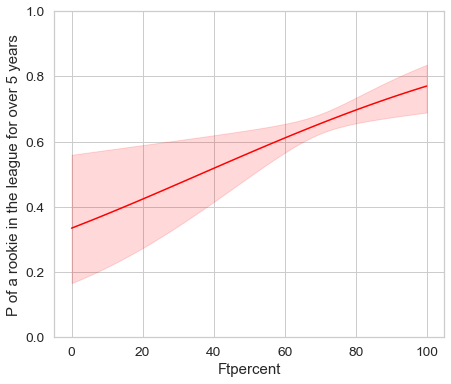

In [51]:
# define colors
cust_colors = ['red']
sns.set_palette(cust_colors)

# define variables
xVar5 = 'Ftpercent'

fig = sns.lineplot(x = xVar5, 
                   y = 'fit', 
                   data = plotEffect5)

# plot ribbon for level
plt.fill_between(x = xVar5, 
                 y1 = 'lower', 
                 y2 = 'upper', 
                 color = cust_colors[0], 
                 alpha = 0.15, 
                 data = plotEffect5)
    
fig.set(ylabel = 'P of a rookie in the league for over 5 years', 
        ylim = (0, 1));